In [ ]:
import numpy as np #Trabalher com vetor
from sklearn.model_selection import GridSearchCV #Escolher os melhores paramentros dos modelos
from sklearn import datasets, svm #importando banco e modelo
import matplotlib.pyplot as plt #trabalhando com graficos

In [ ]:
digits = datasets.load_digits()

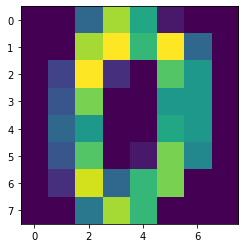

In [ ]:
plt.imshow(digits.images[0])

In [ ]:
# Create dataset 1
data1_features = digits.data[:1000]
data1_target = digits.target[:1000]

# Create dataset 2
data2_features = digits.data[1000:]
data2_target = digits.target[1000:]

In [ ]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [ ]:
# Create a classifier object with the classifier and parameter candidates
clf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, n_jobs=-1)

# Train the classifier on data1's feature and target data
clf.fit(data1_features, data1_target)   

GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']},
                         {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [ ]:
clf.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

In [ ]:
best_clf=clf.best_estimator_

In [ ]:
y_pred=best_clf.predict(data2_features)

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(data2_target,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99        79
           1       0.99      0.95      0.97        80
           2       0.99      0.99      0.99        77
           3       0.97      0.87      0.92        79
           4       0.99      0.95      0.97        83
           5       0.95      0.99      0.97        82
           6       0.99      0.99      0.99        80
           7       0.96      1.00      0.98        80
           8       0.93      1.00      0.96        76
           9       0.94      0.98      0.96        81

    accuracy                           0.97       797
   macro avg       0.97      0.97      0.97       797
weighted avg       0.97      0.97      0.97       797

